 Task-1

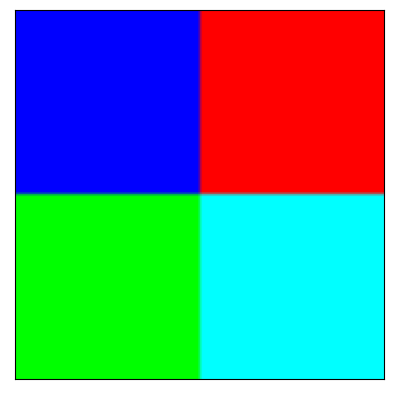

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Img1 = np.zeros((50,50,3) , dtype= "uint8") #first image
Img1[:] =[255,0,0] # BGR --> Blue image
Img2 = np.zeros((50,50,3) , dtype= "uint8") #second Image
Img2[:] =[0,0,255] # BGR -- > Red Image
Img3 = np.zeros((50,50,3) , dtype= "uint8") #Third Image
Img3[:] =[0,255,0] # BGR -- > Green Image
Img4 = np.zeros((50,50,3),dtype="uint8") # fourth Image
Img4[:] = (255,255,0) # BGR --> yellow Image
FirstRow=np.hstack((Img1,Img2))
SecondRow = np.hstack((Img3,Img4))
Img=np.vstack((FirstRow,SecondRow)) # adding two rows
Img=cv.resize(Img,(200,200)) #resize (100,100) to (200,200)
Img =cv.cvtColor(Img,cv.COLOR_BGR2RGB)
plt.imshow(Img)
plt.xticks([])
plt.yticks([])
plt.show()

Task-2

In [13]:
import numpy as np
import cv2 as cv


flag=0
save=0
vidsave =0
i=0
f=0
r=0
h=0
fourcc= cv.VideoWriter_fourcc(*'XVID')
videofile='output_video.avi'
out = cv.VideoWriter(videofile,fourcc,20.0,(640,480))
cap=cv.VideoCapture(0)
cap.set(4,640)
cap.set(3,480)
while True :
    success, frame = cap.read()
    cv.imshow("Frames",frame)
    d=cv.waitKey(1)
                            #check on clicks
    if d == ord('S') :
        vidsave = 'S'
    elif d == ord('R')  :
        cv.destroyAllWindows()
        flag ='R'
    elif d==ord('Z') :
        cv.destroyAllWindows()
        flag ='Z'
    elif d==ord('H') :
        cv.destroyAllWindows()
        flag ='H'
    elif d==ord('X') :
        cv.destroyAllWindows()
        flag ='X'
    elif d==ord ('G'):
        cv.destroyAllWindows()
        flag ='G'
    elif d==ord ('C'):
        save ='C'
    elif d == ord('Q'):
        cv.destroyAllWindows()
        flag = 'Q'
    else :                  # if not pressed on  any key so the will check on flags :D
        if flag =='G':
            Gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            cv.imshow("Grayscale",Gray_frame)
            if save == 'C' : #if want to take screenshot
                i=+1
                cv.imwrite('Resources/Gray_image'+str([i]) +'.png',Gray_frame)
            save=0
            if vidsave == 'S' : #if want to take video capture 
                Gray_frame = cv.cvtColor(Gray_frame,cv.COLOR_GRAY2BGR)
                out.write(Gray_frame)
        elif flag =='H' :
            HSV_frame = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
            cv.imshow("HSV",HSV_frame)
            if save == 'C':
                h+=1
                cv.imwrite('Resources/HSV_image' + str([h]) + '.png', HSV_frame)
            save=0
            if vidsave == 'S' :
                out.write(HSV_frame)
        elif flag == 'R' :
            rotated_frame = cv.rotate(frame, cv.ROTATE_90_CLOCKWISE)
            cv.imshow("Rotated",rotated_frame)
            if save == 'C' :
                r+= 1
                cv.imwrite('Resources/Rotated_image' + str([r]) + '.png', rotated_frame)
            save =0
            if vidsave == 'S' :
                rotated_frame=cv.resize(rotated_frame,(480,640))
                out.write(rotated_frame)
        elif flag == 'Q' :
            if vidsave == 'S' :
                out.release()
            cap.release()
            cv.destroyAllWindows()  
            break
        elif flag == 'Z' :
            cv.imshow("Original", frame)
            if save == 'C' :
                f+=1
                cv.imwrite('Resources/Original_image' + str([f]) + '.png', frame)
            save = 0
            if vidsave == 'S' :
                out.write(frame)
        elif flag == 'X':
            cv.imshow("Rotated", rotated_frame)
            cv.imshow("Grayscale", Gray_frame)
            cv.imshow("HSV", HSV_frame)
            cv.imshow("Original", frame)
            if save =='C':
                i+=1
                h+=1
                f+=1
                r+=1
                cv.imwrite('Resources/Gray_image' + str([i]) + '.png', Gray_frame)
                cv.imwrite('Resources/Hsv_image' + str([h]) + '.png', HSV_frame)
                cv.imwrite('Resources/rotated_image' + str([r]) + '.png', rotated_frame)
                cv.imwrite('Resources/Original_image' + str([f]) + '.png', frame)
            save=0
            if vidsave == 'S':
               print("Can't save video in this mode --> select mode from (R,G,H,Z) :D")
            vidsave=0   


